In [11]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv("C:\\Users\\KK\\Downloads\\train.csv\\train.csv")
# test = pd.read_csv("C:\\Users\\KK\\Downloads\\test.csv\\test.csv")

In [7]:
df

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


In [9]:
df1 = df.drop(['ID','RecipeName','CommentID','UserID','UserName','CreationTimestamp','Recipe_Review'], axis = 1)
df1

,RecipeNumber,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
0,71,12259,20,0,0,0,5,100
1,88,8202,1,0,0,1,5,100
2,3,2832,1,0,0,0,3,100
3,50,100276,1,0,0,0,5,100
4,12,19731,1,0,0,0,4,100
...,...,...,...,...,...,...,...,...
13631,98,11767,1,0,0,0,5,100
13632,6,21444,1,0,0,0,5,100
13633,37,20170,1,0,0,0,5,100
13634,63,24886,1,0,0,0,5,100


In [10]:
df1.isnull().sum()

RecipeNumber       0
RecipeCode         0
UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
Rating             0
BestScore          0
dtype: int64

<Axes: xlabel='RecipeNumber', ylabel='Density'>

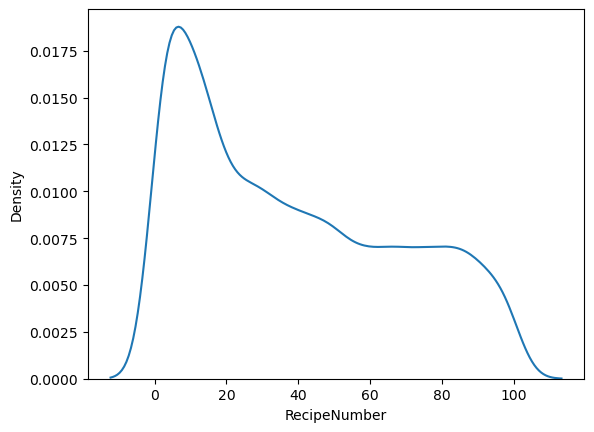

In [12]:
sns.kdeplot(df1, x = 'RecipeNumber')

In [15]:
X = df1.drop(['Rating','RecipeNumber','RecipeCode'], axis = 1)
X

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,20,0,0,0,100
1,1,0,0,1,100
2,1,0,0,0,100
3,1,0,0,0,100
4,1,0,0,0,100
...,...,...,...,...,...
13631,1,0,0,0,100
13632,1,0,0,0,100
13633,1,0,0,0,100
13634,1,0,0,0,100


In [14]:
y = df1['Rating']
y

0        5
1        5
2        3
3        5
4        4
        ..
13631    5
13632    5
13633    5
13634    5
13635    5
Name: Rating, Length: 13636, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
my_model = LogisticRegression()
my_model.fit(X_train_scaled,y_train)

y_pred = my_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy:", accuracy)

accuracy: 0.7517777777777778
